# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Dataset

In [2]:
loan_df=pd.read_csv(r"C:\Users\hp\Downloads\Loan payments data.csv")

In [3]:
loan_df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


# checking the shape

In [4]:
loan_df.shape

(500, 11)

# checking info,describe

In [5]:
loan_df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [7]:
loan_df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

gr=loan_df.groupby('education')[['Principal','terms','past_due_days','age']].mean()
gr

Average loan amount by education level = Educated borrowers may earn more or qualify for bigger loans.


Average loan repayment duration = Varies by group.

Average delay in loan repayment = Higher education → fewer overdue days.

Average age of borrowers in each education group = Graduates slightly older.

In [9]:
gr=loan_df.groupby('Principal')['past_due_days'].count()
gr

Principal
300       0
500       1
700       0
800      42
900       0
1000    157
Name: past_due_days, dtype: int64

It tells us how many loans of each principal amount have recorded overdue information.

In [10]:
cols=loan_df.columns
for i in cols:
    print(f'unique values of {i}:')
    print(loan_df[i].unique())

unique values of Loan_ID:
['xqd20166231' 'xqd20168902' 'xqd20160003' 'xqd20160004' 'xqd20160005'
 'xqd20160706' 'xqd20160007' 'xqd20160008' 'xqd20160909' 'xqd20160010'
 'xqd20160011' 'xqd20160012' 'xqd20160013' 'xqd20160014' 'xqd20160015'
 'xqd20160016' 'xqd20160017' 'xqd20160018' 'xqd20160019' 'xqd20160020'
 'xqd20160021' 'xqd20160022' 'xqd20160023' 'xqd20160024' 'xqd20160025'
 'xqd20160026' 'xqd20160027' 'xqd20170088' 'xqd20160029' 'xqd20160030'
 'xqd88160031' 'xqd20160032' 'xqd20160033' 'xqd22169034' 'xqd20160035'
 'xqd20160036' 'xqd20160037' 'xqd20160038' 'xqd20160039' 'xqd20160040'
 'xqd20160041' 'xqd20160042' 'xqd20160043' 'xqd20160044' 'xqd20160045'
 'xqd20160046' 'xqd20160047' 'xqd20160048' 'xqd20160049' 'xqd20160050'
 'xqd20160051' 'xqd20160052' 'xqd20160053' 'xqd20160054' 'xqd20160055'
 'xqd20160056' 'xqd20160057' 'xqd20160058' 'xqd20160059' 'xqd20160060'
 'xqd20160061' 'xqd20160062' 'xqd20160063' 'xqd20160064' 'xqd20160065'
 'xqd20160066' 'xqd20160067' 'xqd20160068' 'xqd2016

In [11]:
loan_df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [12]:
loan_df.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

# Data preprocessing


## a. missing values handling

In [13]:
loan_df['paid_off_time']=loan_df['paid_off_time'].fillna(loan_df['due_date'])

The code replaces missing paid_off_time values with the corresponding due_date.
This assumes that loans with no recorded payment time were paid on time, ensuring data completeness and preventing errors during date-based calculations (like overdue days).

##### histplot

<Axes: xlabel='past_due_days', ylabel='Count'>

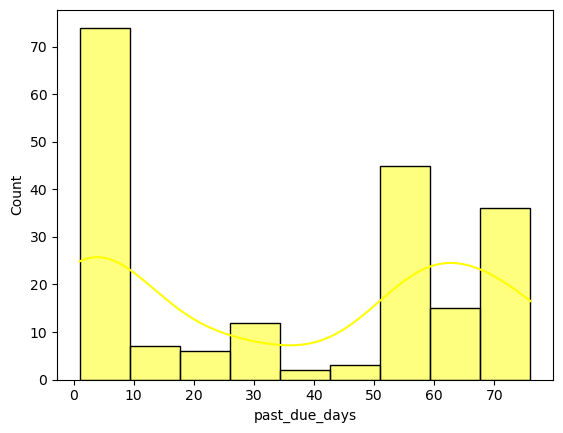

In [14]:
sns.histplot(x='past_due_days',data=loan_df,kde=True,color='yellow')

In [15]:
#x-axis shows the number of days the loan payment was delayed
#y-axis shows how many borrowers fall into each delay range

In [16]:
loan_df.loc[(loan_df['loan_status']=="PAIDOFF")&(loan_df['past_due_days'].isna()),'past_due_days']=0
loan_df['past_due_days'].fillna(-1,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14372\2182710764.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['past_due_days'].fillna(-1,inplace=True)


For PAIDOFF loans with missing overdue info, it sets past_due_days = 0 (on time).

For all other missing cases, it fills with -1 to indicate unpaid or unknown overdue days.

In [17]:
loan_df.isna().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

## b.Univariate,Bivariate,multivariate Analysis

### *i. univariate*

histplot

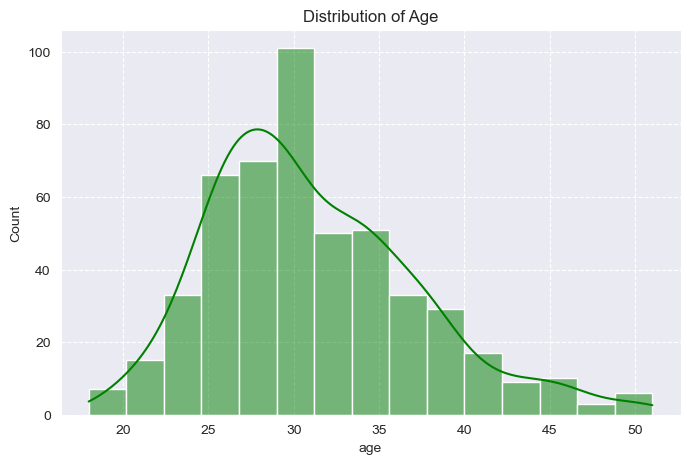

In [18]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(loan_df['age'],bins=15,kde=True,color='green',edgecolor='white')
plt.title('Distribution of Age')
plt.grid(True,linestyle='--',alpha=1)
plt.show()

##### the histogram shows that most loan applicants are btwn 25 and 40 yrs old
##### fewer applicants in older age groups
##### right skewed

boxplot

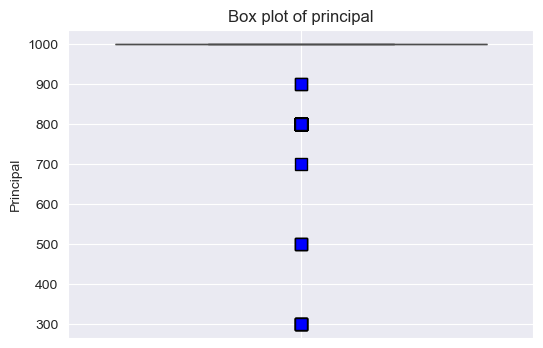

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(y=loan_df['Principal'],color='red',
           flierprops=dict(marker='s',
                          markersize=8,
                          markerfacecolor='blue',
                          markeredgecolor='black')
           )
plt.title('Box plot of principal')
plt.grid(True)
plt.show()

##### most loans are taken for standard fixed amounts like 300-1000,with very little variation .

In [22]:
loan_df['Principal'].unique()

array([1000,  300,  800,  900,  700,  500])

kde plot

C:\Users\hp\AppData\Local\Temp\ipykernel_14372\765343127.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=loan_df['past_due_days'],shade=True,color='brown')


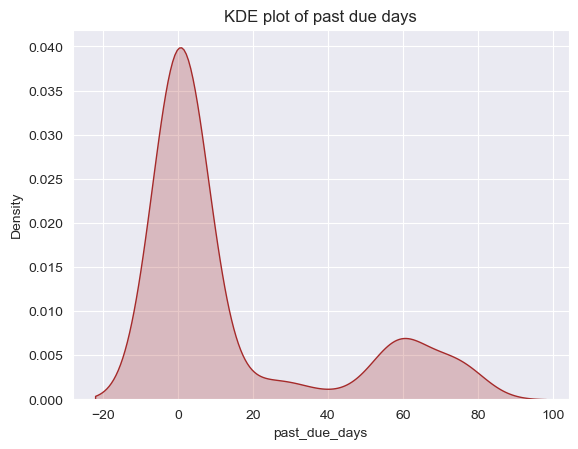

In [23]:
sns.kdeplot(data=loan_df['past_due_days'],shade=True,color='brown')
plt.title("KDE plot of past due days")
plt.show()

#### most borrowers paid their loans on time.small no. of borrowers has higher delay days

count plot

C:\Users\hp\AppData\Local\Temp\ipykernel_14372\3031818580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status',data=loan_df,palette='viridis')


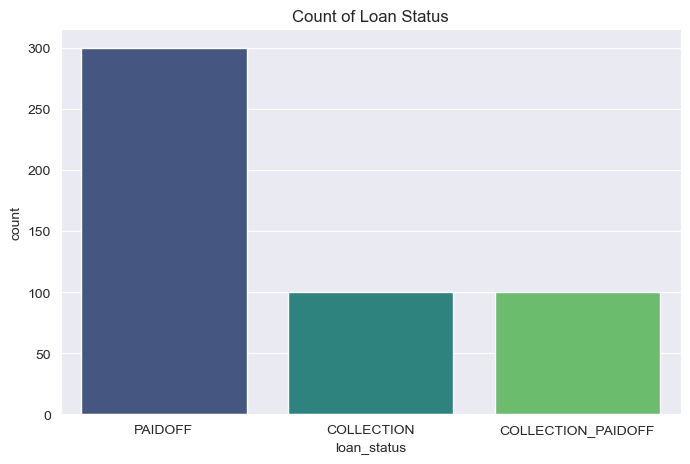

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='loan_status',data=loan_df,palette='viridis')
plt.title('Count of Loan Status')
plt.show()

##### most loans are paid on time

### ii.bivariate

violin plot

C:\Users\hp\AppData\Local\Temp\ipykernel_14372\4135091978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='education',y='Principal',data=loan_df,palette='pastel')


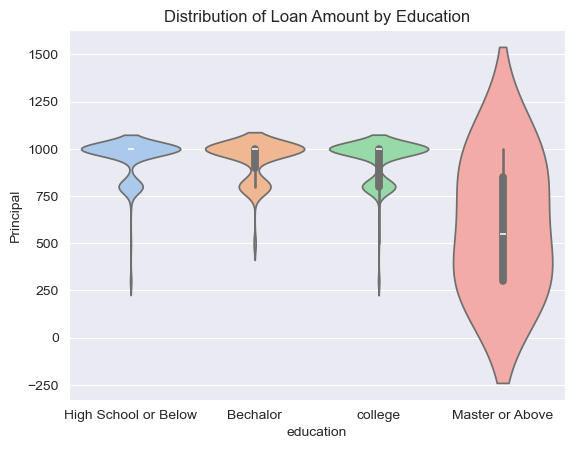

In [27]:
sns.violinplot(x='education',y='Principal',data=loan_df,palette='pastel')
plt.title('Distribution of Loan Amount by Education')
plt.show()

##### loan amount vary with education.borrowers with higher education take larger and more varied loan amounts.while those with lower education levels usually borrow smaller and similar amounts

boxplot

C:\Users\hp\AppData\Local\Temp\ipykernel_14372\765478391.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender',y='past_due_days',data=loan_df,


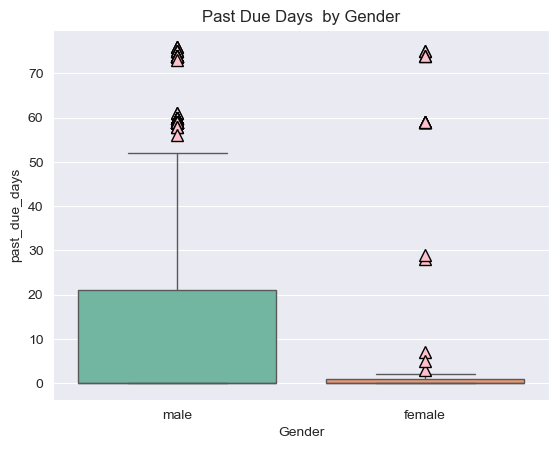

In [28]:
sns.boxplot(x='Gender',y='past_due_days',data=loan_df,
            palette='Set2',flierprops=dict(marker='^',
                          markersize=8,
                          markerfacecolor='pink',
                          markeredgecolor='black')
           )
plt.title('Past Due Days  by Gender')
plt.show()

#### Female borrowers are more punctual and consistent, while male borrowers are more likely to have longer payment delays and more extreme late cases.

#### iii.multivariate 

heatmap

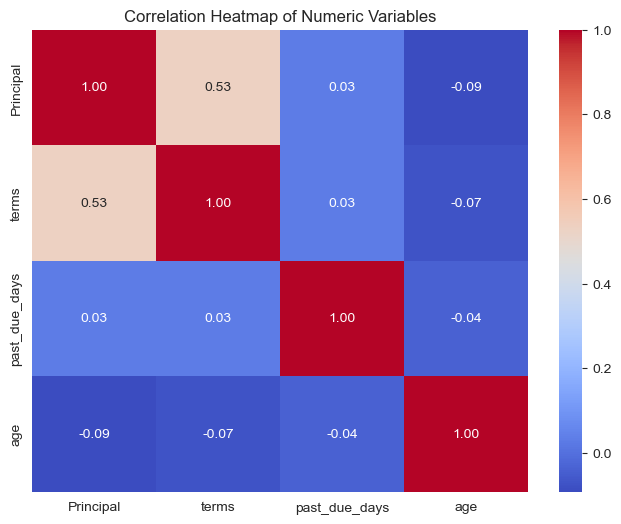

In [29]:
plt.figure(figsize=(8,6))
corr = loan_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

##### each cell represents the correlation co-efficient btwn two variables
#####  1 : perfectly positively correlated
##### -1 : perfectly negatively correlated
#####  0 : no linear correlation

paiplot

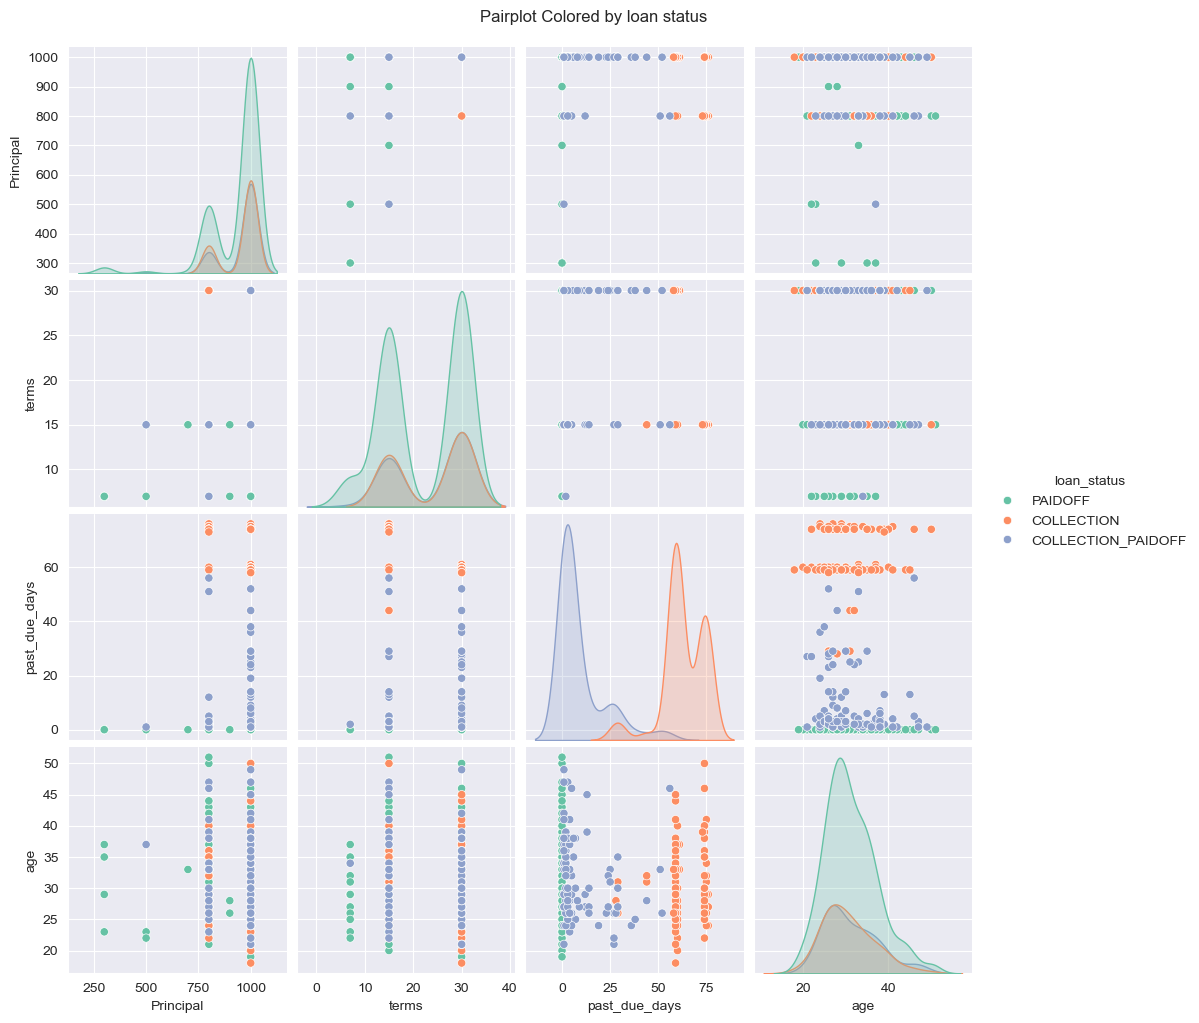

In [30]:
sns.pairplot(loan_df, hue='loan_status', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot Colored by loan status', y=1.02)
plt.show()

relationships between multiple numeric variables in the loan dataset
This pairplot visualizes how different loan features relate to each other — particularly Principal, terms, past_due_days, and age — across different loan statuses.


### c.Outlier detection

In [31]:
num_cols=loan_df.select_dtypes(include='number')
num_cols

,Principal,terms,past_due_days,age
0,1000,30,0.0,45
1,1000,30,0.0,50
2,1000,30,0.0,33
3,1000,15,0.0,27
4,1000,30,0.0,28
...,...,...,...,...
495,1000,30,3.0,28
496,1000,15,14.0,26
497,800,15,3.0,30
498,1000,30,1.0,38


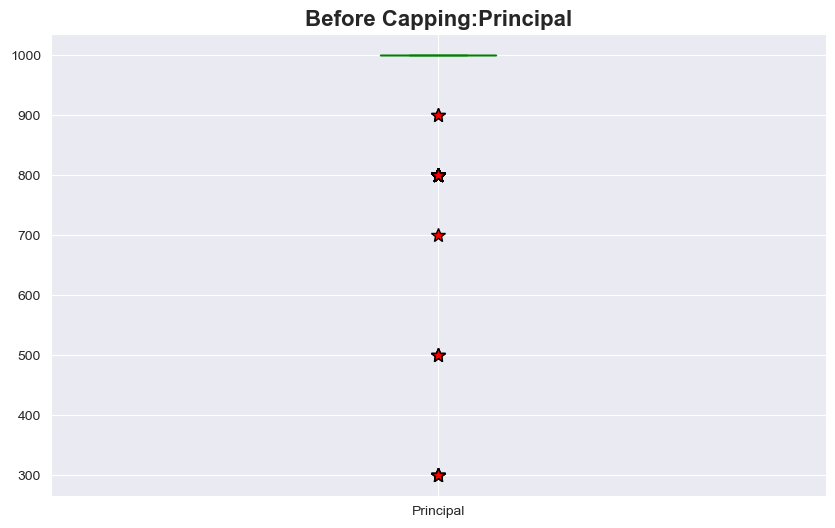

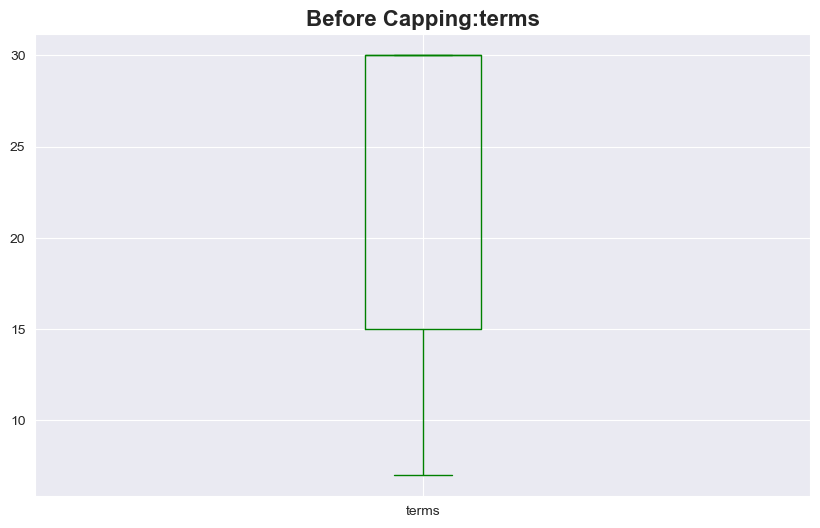

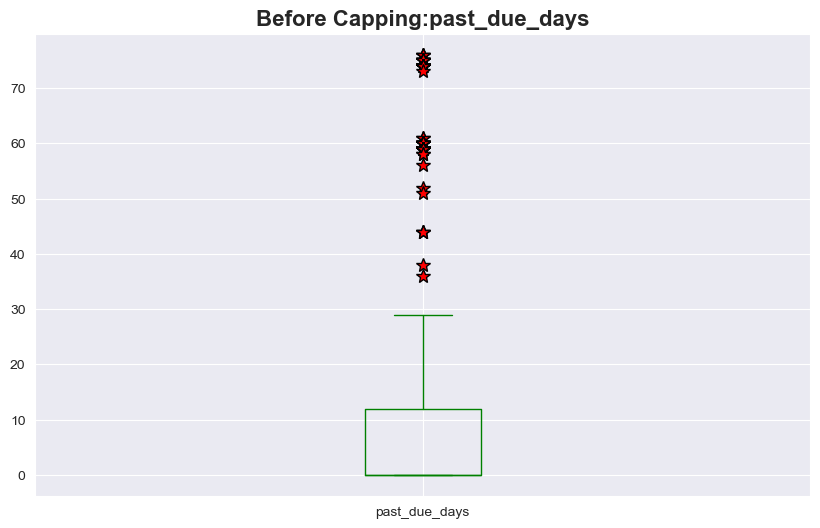

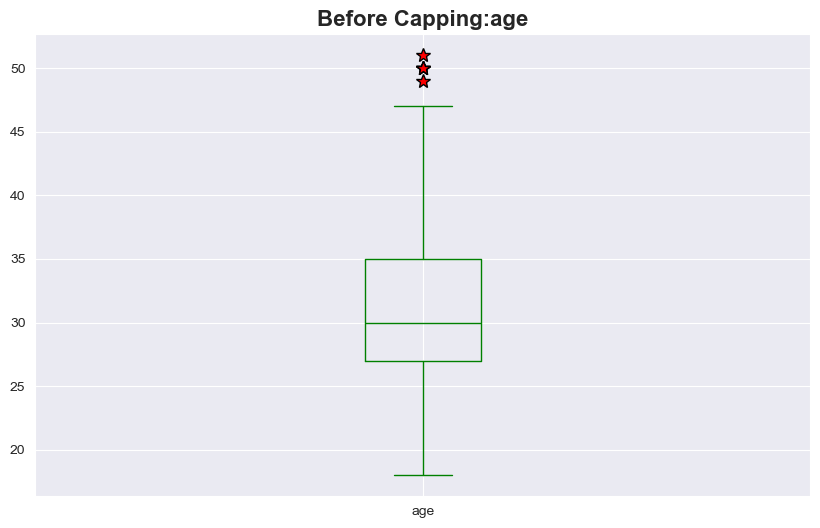

In [32]:
for col in num_cols:
    plt.figure(figsize=(10,6))
    loan_df.boxplot(column=[col],color='green',
                   flierprops=dict(marker='*',
                                  markersize=10,
                                  markerfacecolor='red',
                                  markeredgecolor='black',
                                  )
                   )
    plt.title(f'Before Capping:{col}',fontsize=16,fontweight='bold')
    
    plt.show()

In [33]:
for col in num_cols:
    Q1=loan_df[col].quantile(0.25)
    Q3=loan_df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_cap=Q1-1.5*IQR
    upper_cap=Q3+1.5*IQR
    loan_df[col]=loan_df[col].clip(lower_cap,upper_cap)

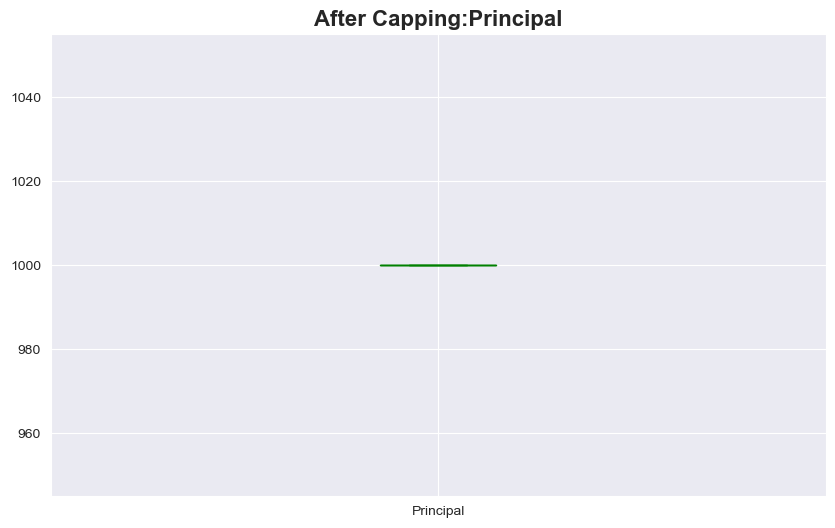

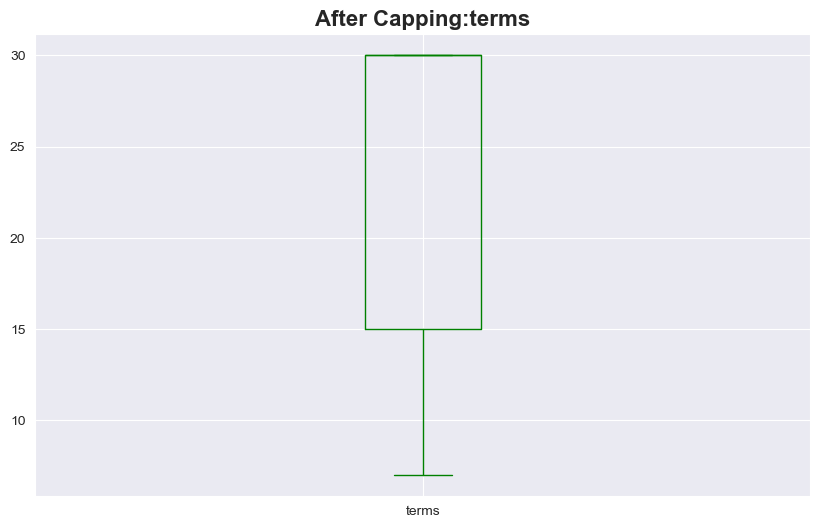

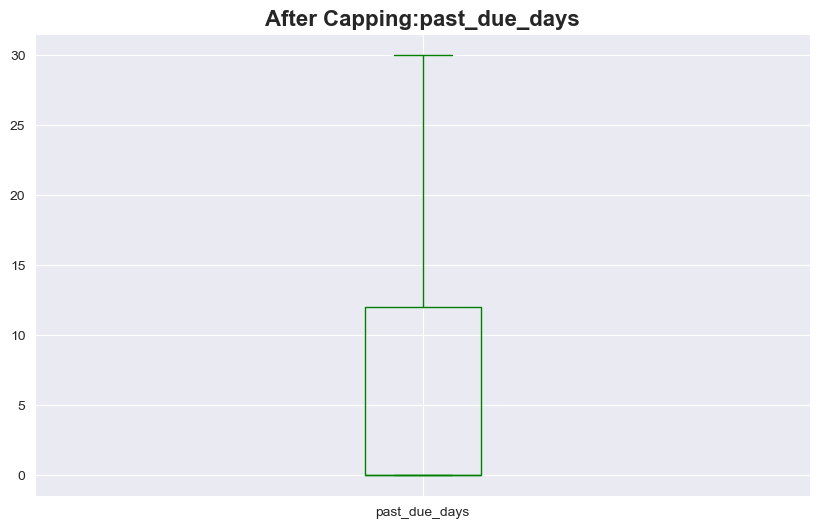

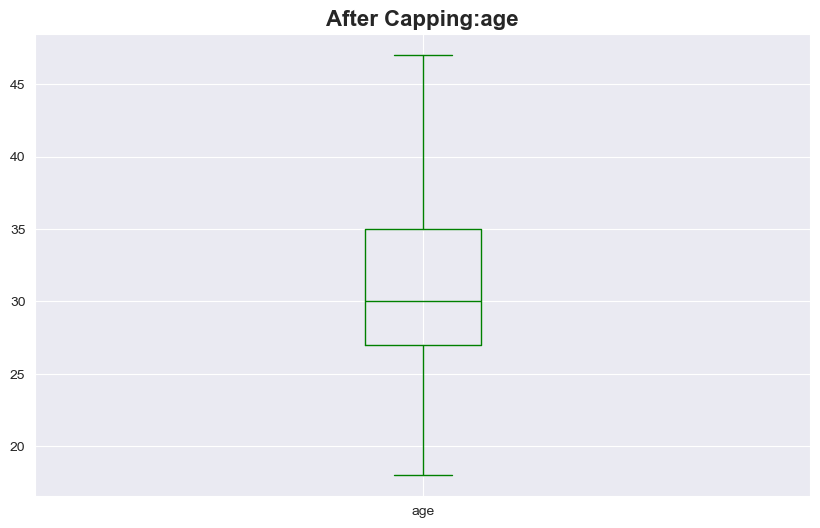

In [35]:

for col in num_cols:
    plt.figure(figsize=(10,6))
    loan_df.boxplot(column=[col],color='green',
                   flierprops=dict(marker='*',
                                  markersize=10,
                                  markerfacecolor='red',
                                  markeredgecolor='black',
                                  )
                   )
    plt.title(f'After Capping:{col}',fontsize=16,fontweight='bold')
    
    plt.show()